# 3.4.2 - Gaussian Mixture Models (GMM)


* En este Notebook vamos a ver el Algoritmo del ***Gaussian Mixture Models***, que es un ***Algoritmo de Aprendizaje no Supervisado para Clustering***. Vamos a ***resolver un problema de Clusterización usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Gaussian Mixture Models](#M1)
<span></span><br>
    2. [Pseudocódigo del Gaussian Mixture Models](#M2)
<span></span><br>
    3. [Ejemplo sencillo de Clustering con GMM](#M3)
<span></span><br>
    4. [Ejemplo Clustering: Segmentación de Clientes en Centros comerciales](#M4)
    <span></span><br>
        4.1. [Carga de datos](#M41)
    <span></span><br>
        4.2. [Cambio de estructura de datos a numpy](#M42)
    <span></span><br>
        4.3. [Visualización de los datos](#M43)
    <span></span><br>
        4.4. [Selección del Número óptimo de Cluster](#M44)
    <span></span><br>
        4.5. [Creacción del modelo y ajuste](#M45)
    <span></span><br>
        4.6. [Obtención del modelo (hipótesis)](#M46)
    <span></span><br>
        4.7. [Conclusiones: Interpretación de los resultados](#M47)


<hr>



## <a name="M1">1. Gaussian Mixture Models</a>


* El ***Gaussian Mixture Models (GMM) es un método estadístico de Clustering similar al K-means, pero con un enfoque probabilístico***. 


* ***Este método asume que todos los objetos (del dataset) han sido generados a partir de ‘k’ distribuciones de probabilidad*** de las cuales desconocemos a priori sus parámetros.


* En la siguiente imagen de ejemplo, podemos ver como los ***dos grupos de objetos (Clusters) se generan de acuerdo a dos distribuciones de probabilidad; por ejemplo dos distribuciones normales*** (gaussianas) p(x|μ,σ) definidas por su media (μ) y su desviación típica (σ):


<img src="../../imgs/3_04_02_01_gmm.png" style="width: 300px;"/>


* El ***Gaussian Mixture Models (GMM) es la implementación del algoritmo Expectation-Maximization (EM)*** se usa en estadística para encontrar estimadores de máxima verosimilitud de parámetros en modelos probabilísticos que dependen de variables no observables; asumiendo que estos modelos probabilísticos son distribuciones normales de ahí el nombre de Gaussian Mixture Models (Mezcla de Modelos Gausianos, en Español).


* El problema a resolver es por tanto el calcular la probabilidad de pertenencia de un elemento a cada uno de los Cluster. Para ello tenemos lo siguiente:

    <span style="font-size:16px">$$P(X,C | \pi, \overrightarrow{\mu}, \overrightarrow{\sigma}) = P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) \cdot P(C|\pi); \; donde\;
\left\{\begin{matrix}
\pi = Probabilidad\;de\;pertenecer\;a\;un\;Cluster\\ 
C = Clusters\\ 
X = Elemento\\ 
\mu = Media\;de\;los\;elementos\;del\;Cluster\\ 
\sigma = Desviación\;típica\;de\;los\;elementos\;del\;Cluster
\end{matrix}\right.$$</span>


* En notación **"plate-notation"** seria lo siguiente:


<img src="../../imgs/3_04_02_02_gmm.png" style="width: 300px;"/>


* Lo que nos interesa saber es la ***probabilidad de pertenencia de un elemento a cada uno de los Clusters***:

    <span style="font-size:20px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma})$$</span>


* Tenemos por otro lado que $𝑃(𝐶│\pi)$ es un valor constante ( $𝑃\;(𝑐=1│\pi_1 ), 𝑃\;(𝑐=2│\pi_2 ), …, 𝑃\;(𝑐=𝑘│\pi_𝑘 )$ ), cosa que nos ayuda a la hora de realizar el cálculo de probabilidades quedando de la siguiente manera:

    <span style="font-size:16px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} P(X,C=k | \pi, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} \pi_k \cdot  P(X| \overrightarrow{\mu}, \overrightarrow{\sigma})$$</span>
    
    
* Aplicando la función de densidad de una distribución normal, tenemos que la suma de todas las probabilidades de pertenencia de un elemento a los Clusters es:

    <span style="font-size:16px">$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} \pi_k \cdot  \frac{1}{\sigma_k \sqrt{2\pi}} \cdot e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}$</span>


* Podemos simplificar esta probabilidad ya que $\frac{1}{\sqrt{2\pi}}$ es una constante, quedando:

    <span style="font-size:16px">$$P(X | C, \overrightarrow{\mu}, \overrightarrow{\sigma}) = \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$$</span>
    
    
* Esto último lo podemos hacer ya que lo que ***nos interesa es asignar el elemento al Cluster con mayor probabilidad***; es decir:

    <span style="font-size:20px">$$argmax \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$$</span>

<hr>


## <a name="M2">2. Pseudocódigo del Gaussian Mixture Models</a>


* El algoritmo del Gaussian Mixture Models funciona de la siguiente manera:

    1. ***Inicialización***: Comienza inicializando los parámetros de las distribuciones de probabilidad $(\mu,\sigma)$ y probabilidades de pertenencia a los Clusters $\pi$
<span></span><br><br>    
    2. ***Expectation-Maximization***, hasta converger o hasta que se cumpla una condición de parada:
 <span></span><br><br>   
        + ***Expectation (Esperanza)***: Con los parámetros conocidos de las distribuciones normales y la probabilidad $\pi$ de pertenencia a un Cluster, asignar cada elemento al Cluster con el mayor valor de probabilidad de pertenencia:
<span></span><br><br>  
    <span style="font-size:18px">$argmax \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$</span>
<span></span><br><br>       
        + ***Maximization (Maximización)***: Calcular para cada Cluster; con los ***'n'*** elementos asignados a cada Cluster, el valor de los parámetros $\pi_k, \mu_k, \sigma_k$ de la siguiente manera:
<span></span><br><br>       
            * <span style="font-size:16px">$\pi_k = \frac{Elementos\;en\;el\;Cluster}{Total\;Elementos\;Dataset}$</span>
<span></span><br><br>
            * <span style="font-size:16px">$\mu_k = \frac{1}{n} \sum_{i=1}^{n} x_i$</span>
<span></span><br><br>
            * <span style="font-size:16px">$\sigma_k = \sqrt{\frac{1}{n-1} \cdot \sum_{n=1}^{n} (x_i-\mu_i)^2}$</span> 
            


# <a name="M3">3. Ejemplo sencillo de Clustering con GMM</a>


* Para resolver el problema de Clustering vamos a utilizar la clase **"GaussianMixture()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html


* El problema a resolver, va a ser el de agrupar los siguientes puntos definidos por dos variables $X1$ y $X2$ en 'N' grupos (Clusters) cuyos elementos sean similares dentro del mismo grupo pero diferentes de los elementos de los otros grupos. ***Estos 'N' Clusters los calcularemos encontrando los parámetros ($\pi_k, \mu_k, \sigma_k$) de las distribuciones normales*** ocultas en los datos: 
<span></span><br><br>
    <span style="font-size:18px">$$argmax \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$$</span>


* Los puntos a Clusterizar serían los siguientes:

[]

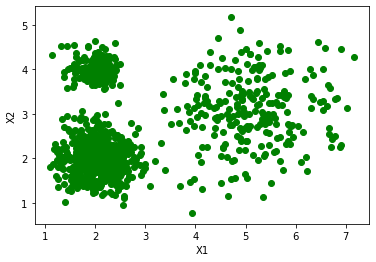

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Leemos los datos
X = np.loadtxt('../../data/DS_3Clusters_999Puntos.txt', delimiter='::')

# Pintamos los elementos
plt.scatter(X[:,0], X[:,1], color='g', marker='o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot()

* Viendo la gráfica, parece que se diferencian 3 grupos de puntos, por lo que vamos a pasar a calcular estos grupos con el Algoritmo de Aprendizaje del GMM implementado en Scikit.


* Para ello vamos a pasar como parámetros el número de Clusters que queremos calcular que en este caso serán 3:

In [2]:
from sklearn.mixture import GaussianMixture

# Creamos un objeto de la clase "GaussianMixture()" 
gmm = GaussianMixture(n_components=3, init_params='kmeans', max_iter=50)

# Ajustamos el modelo 
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=50,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

* Una vez ajustado el modelo vamos a obtener la información de los Clusters:
<span></span><br><br>
    1. ***Número de elementos por Cluster***: Tenemos que llamar al método **".predict()"** para que prediaga el cluster de cada elemento y luego contar cuandos elementos hay en cada Cluster.
<span></span><br><br>
    2. ***Media de las variables del Cluster***: Esto lo hacemos llamando al atributo **"means_"** de la clase GaussianMixture.
<span></span><br><br>
    3. ***Desviación típica de las variables del Cluster***: Esto lo hacemos llamando al atributo **"covariances_"** de la clase GaussianMixture, que nos devuelve la matriz de covarianzas y nos quedaremos con la diagonal.
<span></span><br><br>
    4. ***Probabilidad de pertenencia al Cluster***: Esto lo hacemos llamando al atributo **"weights_"** de la clase GaussianMixture.

In [3]:
items_cluster = gmm.predict(X)
medias_clusters = gmm.means_
desviaciones_clusters = gmm.covariances_
probabilidad_clusters = gmm.weights_
for i, c in enumerate(medias_clusters):
    print ('Cluster {c}'.format(c=(i + 1)))
    print ('\tNúmero de Items en el Cluster {n}'.format(n=items_cluster.tolist().count(i)))
    print ('\tCentroides: {centroides}'.format(centroides=medias_clusters[i]))
    print ('\tDesviación Típica: {desviacion}'.format(desviacion=np.diag(desviaciones_clusters[i])))
    print ('\tProbabilidad del Cluster: {prob:0.2f} %'.format(prob=(probabilidad_clusters[i] * 100)))

Cluster 1
	Número de Items en el Cluster 571
	Centroides: [2.02709346 2.00383707]
	Desviación Típica: [0.14335478 0.14462935]
	Probabilidad del Cluster: 57.06 %
Cluster 2
	Número de Items en el Cluster 242
	Centroides: [5.0847996  3.06079673]
	Desviación Típica: [0.6980079  0.63442704]
	Probabilidad del Cluster: 24.31 %
Cluster 3
	Número de Items en el Cluster 186
	Centroides: [1.99714463 4.01781441]
	Desviación Típica: [0.06403775 0.04952147]
	Probabilidad del Cluster: 18.63 %


* Por último vamos a visualizar lo siguiente:
    + Como quedarían los puntos en sus respectivos Clusters.
    + Los centroides de los clusters.
    + Las regiones de pertenencia de cada uno de los Clusters en el espacio.

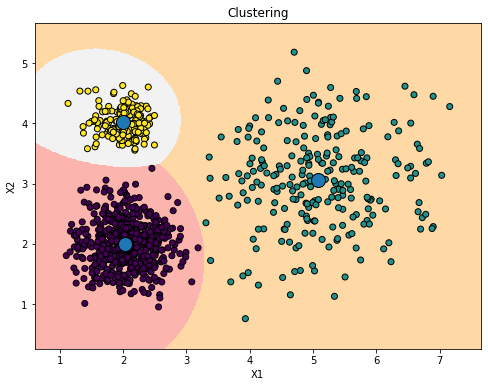

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# Dibujamos los puntos del dataset
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.viridis)

# Dibujamos los Centroides
centroides = gmm.means_
plt.plot(centroides[:, 0], centroides[:, 1], 'o', markeredgecolor='k', markersize=14)

plt.title('Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<hr>


## <a name="M4">4. Ejemplo Clustering: Segmentación de Clientes en Centros comerciales</a>


* En este punto vamos a resolver un problema de ***Clusterización usando la librería de Scikit-Learn***, que consistirá en ***perfilar a los clientes*** que compran en un centro comercial.


* Para ello disponemos de la siguiente información de los clientes:

    1. ***Gender***: Male|Female
    2. ***Age***: Edad del cliente
    3. ***Annual_Income***: Ingresos anuales del cliente (por miles de dolares)
    4. ***Spending_Score***: Una valoración que va de 0 a 100 en función del número de compras y dinero que gasta el cliente.


* El objetivo de este ejemplo es el de ***agrupar (Clusterizar) a los clientes y sacar el perfíl de estos grupos***, para que posteriormente a clientes de ese perfíl se le puedan aplicar las acciones comerciales correspondientes.


* Para resolver este problema vamos a realizar los siguientes pasos:
    <span></span><br>
    4.1. [Carga de datos](#M41)
    <span></span><br>
    4.2. [Cambio de estructura de datos a numpy](#M42)
    <span></span><br>
    4.3. [Visualización de los datos](#M43)
    <span></span><br>
    4.4. [Selección del Número óptimo de Cluster](#M44)
    <span></span><br>
    4.5. [Creacción del modelo y ajuste](#M45)
    <span></span><br>
    4.6. [Obtención del modelo (hipótesis)](#M46)
    <span></span><br>
    4.7. [Conclusiones: Interpretación de los resultados](#M47)


<hr>


* En primer lugar vamos a importar las librería necesarias:

In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
%matplotlib inline 

<hr>


## <a name="M41">4.1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/Mall_Customers.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***CustomerID***
    - ***Gender***
    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***

In [6]:
df = pd.read_csv("../../data/Mall_Customers.csv")
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
59,60,Male,53,46,46
164,165,Male,50,85,26
85,86,Male,48,54,46
1,2,Male,21,15,81
72,73,Female,60,50,49


<hr>


## <a name="M42">4.2. Cambio de estructura de datos a numpy
    
* Vamos a pasar los datos que nos interesan de los clientes a un array de numpy para que nos sirva como entrada al algoritmo de aprendizaje.


* Para este ejercicio nos vamos a quedar con las variables:

    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***

In [7]:
X = df[['Age', 'Annual_Income', 'Spending_Score']].values

<hr>


## <a name="M43">4.3. Visualización de los datos
    
* Vamos a pasar a ver la relación cada par de variables del Dataset incluido el genero, aunque no lo vayamos a usar en el ejemplo.


* Para poder visualizar el genero, tenemos que transformar las etiquetas a números asigando:
    - 0: Male
    - 1: Female

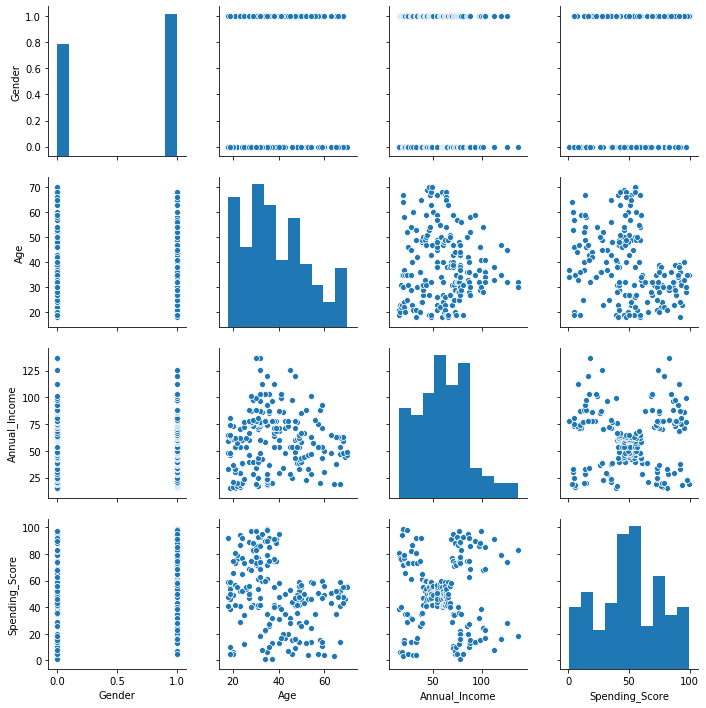

In [8]:
df = df.replace('Male', 0).replace('Female', 1)
sns.pairplot(df[['Gender', 'Age', 'Annual_Income', 'Spending_Score']])

<hr>


## <a name="M44">4.4. Selección del Número óptimo de Clusters
    
    
* Vamos a ver cual sería el número óptimo de Clusters vamos a tener que utilizar el K-means para ver eñ número óptimo de clusters con el método del codo; es decir, representando la inercia por el número de Clusters seleccionados y viendo donde se produce un cambio busco de tendencia.


* Con los resultados obtenidos cuesta ver donde hay un cambio busco de tendencia si son para 4, 5 o 6 Clusters.

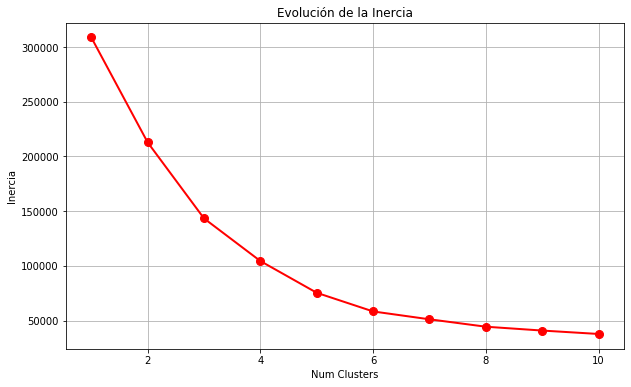

In [9]:
num_modelos = 10

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):
       
    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)
    
    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])
    

x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

<hr>


## <a name="M45">4.5. Creacción del modelo (hipótesis) y ajuste
    
    
* Para crear el modelo vamos a seleccionar 5 Clusters.

In [10]:
# Creamos un objeto de la clase "GaussianMixture()" 
gmm = GaussianMixture(n_components=5, init_params='kmeans', max_iter=50)

# Ajustamos el modelo 
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=50,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<hr>


## <a name="M46">4.6. Obtención del modelo (hipótesis)


* Tras ajustar el modelo podemos obtener el valor medio de cada variable en cada Cluster.

In [11]:
# Valores de los centroides
centroides = gmm.means_
df_centroides = pd.DataFrame(centroides, 
                             columns=['Age', 'Annual_Income', 'Spending_Score'],
                             index=['Cluster {}'.format(index+1) for index, elem in enumerate(centroides)])
df_centroides

,Age,Annual_Income,Spending_Score
Cluster 1,43.056664,56.619057,49.292410
Cluster 2,43.449112,29.234370,26.289304
Cluster 3,41.007033,89.062137,15.954580
Cluster 4,25.009131,25.488112,80.069322
Cluster 5,32.693115,86.418475,82.046922


<hr>


## <a name="M47">4.7. Conclusiones: Interpretación de los resultados
    

* Con los resultados obtenidos podemos concluir:
<span></span><br><br>
    - ***Cluster 1***: Clientes de ***edad media*** (32,7 años) con ***altos ingresos*** (86,4K) y y un ***Scoring de compra Muy Alto*** (82%).
<span></span><br><br>
    - ***Cluster 2***: Clientes más ***jóvenes*** (25 años) edad media, con ***ingresos bajos*** (25,4K) y un ***Scoring de compra Alto*** (80%).
<span></span><br><br>
    - ***Cluster 3***: Clientes de ***edad alta*** (43 años) con ***ingresos medios*** (56,6K) y y un ***Scoring de compra Medio*** (49,3%).
<span></span><br><br>
    - ***Cluster 4***: Clientes de ***edad más alta*** (43,6 años) con ***ingresos bajos*** (29,3K) y un ***Scoring de compra Bajo*** (26%).
<span></span><br><br>
    - ***Cluster 5***: Clientes con la ***edad media-alta*** (41 años) con ***ingresos altos*** (89K) y un ***Scoring de compra Muy Bajo*** (15,9%).

    
* A modo de resumen podemos ver las distribuciones de cada uno de los Clusters por variable:

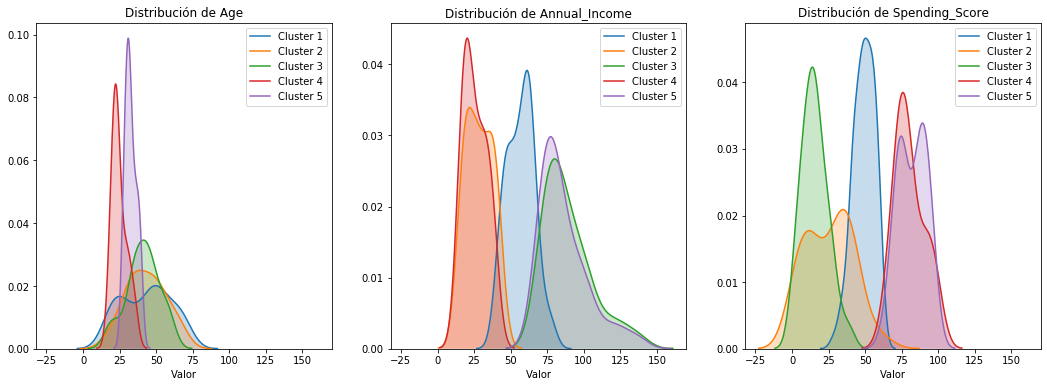

In [12]:
# Obtenemos las etiqueta del cluster a la que se asigna cada elemento
labels = gmm.predict(X)


# Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = labels
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))


# Dibujamos las distribuciones de las 4 variables para cada uno de los Clusters
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
plt_position = [axes[0], axes[1], axes[2]]
for index, col in enumerate(df[['Age', 'Annual_Income', 'Spending_Score']]):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]] 
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel('Valor')

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">